<a href="https://colab.research.google.com/github/kahmengg/sudoku_solver/blob/main/Automatic_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Sudoku Solver



# Imports

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model Training

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
# Load and preprocess the MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=5,        # Small rotation range to avoid confusion
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    zoom_range=0.1          # Reduce zoom to avoid distorting digits too much
)
datagen.fit(trainX)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(trainY), y=trainY)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/sudoku/digit_recognition_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

# Train the model with data augmentation
model.fit(datagen.flow(trainX, trainY, batch_size=128),
          epochs=15,
          validation_data=(testX, testY),
          callbacks=callbacks)


# Save the model
model.save('/content/drive/MyDrive/sudoku/digit_recognition_model.keras')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 220ms/step - accuracy: 0.6444 - loss: 1.1107 - val_accuracy: 0.8185 - val_loss: 0.5879 - learning_rate: 0.0010
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 212ms/step - accuracy: 0.9311 - loss: 0.2286 - val_accuracy: 0.9622 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 208ms/step - accuracy: 0.9549 - loss: 0.1541 - val_accuracy: 0.9801 - val_loss: 0.0666 - learning_rate: 0.0010
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 209ms/step - accuracy: 0.9624 - loss: 0.1271 - val_accuracy: 0.9854 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 216ms/step - accuracy: 0.9671 - loss: 0.1169 - val_accuracy: 0.9892 - val_loss: 0.0356 - learning_rate: 0.0010
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 207ms/step - accuracy: 0.9707 - loss: 0.1042 - val_accuracy: 0.9858 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 203ms/step - accuracy: 0.9727 - l

In [ ]:
model_path = '/content/drive/MyDrive/sudoku/digit_recognition_model.keras'

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

model = load_model(model_path)
# Predict the classes for the test set
predictions = model.predict(testX)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy for each digit
digit_accuracies = []
for digit in range(10):
    # Get indices for all test samples of the current digit
    digit_indices = np.where(testY == digit)[0]

    # Calculate accuracy for this digit
    digit_accuracy = accuracy_score(testY[digit_indices], predicted_classes[digit_indices])
    digit_accuracies.append(digit_accuracy)
    print(f"Accuracy for digit {digit}: {digit_accuracy:.4f}")

# Optionally, print the overall accuracy
overall_accuracy = accuracy_score(testY, predicted_classes)
print(f"Overall accuracy: {overall_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Accuracy for digit 0: 0.9969
Accuracy for digit 1: 0.9965
Accuracy for digit 2: 0.9981
Accuracy for digit 3: 0.9980
Accuracy for digit 4: 0.9949
Accuracy for digit 5: 0.9933
Accuracy for digit 6: 0.9843
Accuracy for digit 7: 0.9951
Accuracy for digit 8: 0.9908
Accuracy for digit 9: 0.9950
Overall accuracy: 0.9944


# Run this Cell n Upload Image Before Running Cells Below

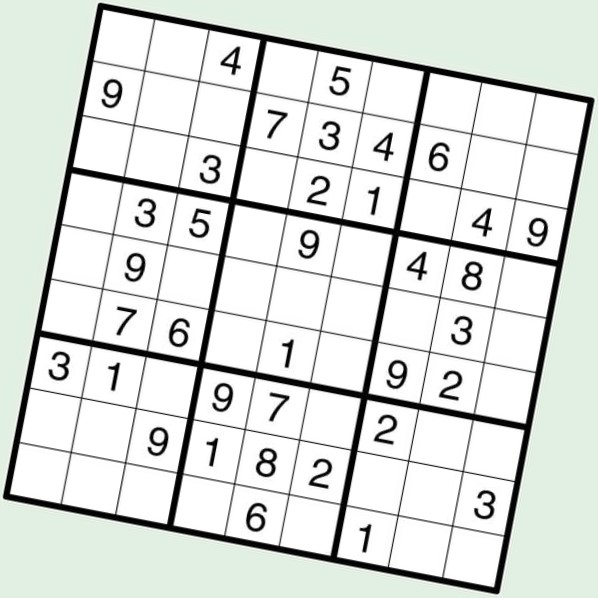

Button(description='Remove Image', layout=Layout(height='40px', width='150px'), style=ButtonStyle(button_color…

Image saved and loaded from: /tmp/Sudoku3.jpg


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Image
import os
# Initialize the image path variable
image_path = None

# Create an upload button with custom styling
upload = widgets.FileUpload(
    accept='image/*',  # Accept image files
    multiple=False,    # Do not allow multiple uploads
    layout=widgets.Layout(width='300px', height='50px'),  # Make the button bigger
    style={'button_color': 'lightblue', 'font_size': '20px'}  # Style the button
)

# Button to remove the uploaded image
remove_button = widgets.Button(
    description='Remove Image',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': 'lightcoral', 'font_size': '16px'}
)

# Function to display the upload widget
def select_image():
    display(upload)

# Function to save the uploaded image, display it, and return the file path
def process_uploaded_image(change):
    global image_path
    if upload.value:
        # Get the uploaded file
        filename = list(upload.value.keys())[0]
        image_data = upload.value[filename]['content']

        # Save the uploaded file to a temporary location
        temp_image_path = os.path.join("/tmp", filename)
        with open(temp_image_path, "wb") as f:
            f.write(image_data)

        # Load the image using OpenCV
        image = cv2.imread(temp_image_path)

        # Convert the image to display in Jupyter
        _, img_encoded = cv2.imencode('.png', image)
        img_display = Image(data=img_encoded.tobytes(), format='png')

        # Display the image and the remove button
        clear_output()  # Clear previous output
        display(img_display, remove_button)

        # Update the image path
        image_path = temp_image_path
        print(f"Image saved and loaded from: {image_path}")
    else:
        print("No image uploaded.")
        image_path = None

# Function to handle removing the uploaded image
def remove_image(b):
    global image_path
    # Clear the output, removing the displayed image and the remove button
    clear_output()
    print("Image removed.")

    # Reset the upload widget and allow a new image to be uploaded
    upload.value.clear()
    select_image()

    # Reset the image path variable
    image_path = None

# Link the upload and remove button to their functions
upload.observe(process_uploaded_image, names='value')
remove_button.on_click(remove_image)

# Display the upload button
select_image()


# Preprocessing

In [ ]:
def preprocess_image(image_path):
    # Load the image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 3)
    thresh = cv2.adaptiveThreshold(blurred, 255,
		cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


    #  Apply adaptive thresholding to enhance the grid lines
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )

    # Apply morphological operations to close gaps in the grid lines
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Apply Canny edge detection
    edged = cv2.Canny(closed, 50, 150)
    cv2_imshow(adaptive_thresh)
    return image, gray, edged, adaptive_thresh, closed, thresh


In [ ]:
def find_sudoku_contour(image_path, typee):
    contours, _ = cv2.findContours(typee, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    sudoku_contour = None

    # Find the largest contour assuming it's the Sudoku grid
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            sudoku_contour = approx
            break
    image = cv2.imread(image_path)
    cv2.drawContours(image, [sudoku_contour], -1, (0, 255, 0), 2)
    # cv2_imshow(image)
    return sudoku_contour


# Grid Detection & Digit Recognition

In [ ]:
from skimage.segmentation import clear_border
from imutils.perspective import four_point_transform
import os

def extract_digit(cell, model, debug=False):
    cell_resized = cv2.resize(cell, (56, 56), interpolation=cv2.INTER_CUBIC)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(cell_resized, (3, 3), 0)

    # Apply automatic thresholding to the cell
    thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Clear any connected borders that touch the border of the cell
    thresh = clear_border(thresh)
    kernel = np.ones((2, 2), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    # thresh = cv2.equalizeHist(thresh)

    # cv2_imshow(thresh)
    # Find contours in the thresholded cell
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours were found, then this is an empty cell
    if len(contours) == 0:
        return None

    # Otherwise, find the largest contour in the cell and create a mask
    contour = max(contours, key=cv2.contourArea)
    mask = np.zeros(thresh.shape, dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # Compute the percentage of masked pixels relative to the total area of the image
    (h, w) = thresh.shape
    percent_filled = cv2.countNonZero(mask) / float(w * h)

    # If less than 3% of the mask is filled, we are likely looking at noise
    if percent_filled < 0.03:
        return None

    # Apply the mask to the thresholded cell to isolate the digit
    digit = cv2.bitwise_and(thresh, thresh, mask=mask)
    digit = thresh
    # Resize the digit image to the input size required by your model
    digit_resized = cv2.resize(digit, (28, 28))  # Assuming model input size is 28x28
    digit_resized = digit_resized.astype('float32') / 255.0  # Normalize to [0, 1]
    digit_resized = np.expand_dims(digit_resized, axis=-1)  # For grayscale images
    digit_resized = np.expand_dims(digit_resized, axis=0)   # Add batch dimension

    # Use the model to predict the digit
    prediction = model.predict(digit_resized)
    predicted_digit = np.argmax(prediction, axis=1)[0]  # Get the digit with the highest probability

    # Debugging: Show the cell image and predicted digit
    if debug:
        cv2_imshow(digit)
        print(f"Predicted Digit: {predicted_digit}")

    return predicted_digit


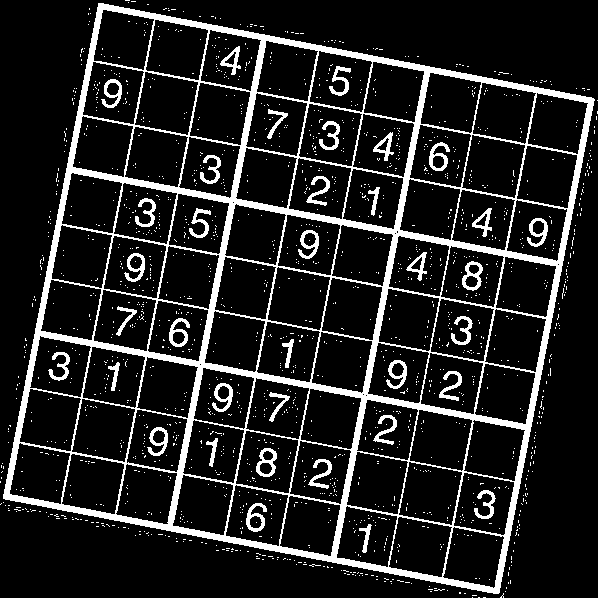

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


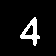

Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


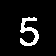

Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


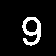

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


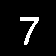

Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


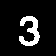

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


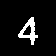

Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


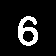

Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


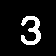

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


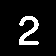

Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


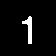

Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


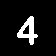

Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


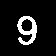

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


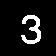

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


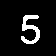

Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


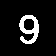

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


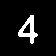

Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


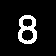

Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


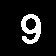

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


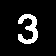

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


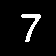

Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


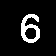

Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


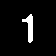

Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


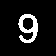

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


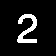

Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


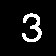

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


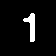

Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


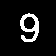

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


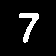

Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


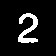

Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


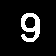

Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


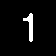

Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


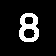

Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


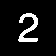

Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


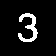

Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


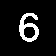

Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


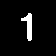

Predicted Digit: 1
Recognized Sudoku Grid:
[[0 0 4 0 5 0 0 0 0]
 [9 0 0 7 3 4 6 0 0]
 [0 0 3 0 2 1 0 4 9]
 [0 3 5 0 9 0 4 8 0]
 [0 9 0 0 0 0 0 3 0]
 [0 7 6 0 1 0 9 2 0]
 [3 1 0 9 7 0 2 0 0]
 [0 0 9 1 8 2 0 0 3]
 [0 0 0 0 6 0 1 0 0]]


In [ ]:
def recognize_sudoku_grid(image_path, model_path, debug=False):
    # Load the trained model
    model = load_model(model_path)

    # Preprocess the image
    image, gray, edged, adaptive_thresh, closed, thresh = preprocess_image(image_path)

    # Find the largest contour which is assumed to be the Sudoku grid
    sudoku_contour = find_sudoku_contour(image_path,adaptive_thresh)

    if sudoku_contour is not None:
        # Apply the perspective transform to obtain a top-down view of the Sudoku puzzle
        warped = four_point_transform(gray, sudoku_contour.reshape(4, 2))

        # Determine the step size to segment the Sudoku grid into 9x9 cells
        stepX = warped.shape[1] // 9
        stepY = warped.shape[0] // 9

        # Initialize a grid to store recognized digits
        sudoku_grid = np.zeros((9, 9), dtype="int")

        # Loop over each cell in the Sudoku grid
        for y in range(0, 9):
            for x in range(0, 9):
                # Extract the cell from the warped image
                cell = warped[y * stepY:(y + 1) * stepY, x * stepX:(x + 1) * stepX]

                # Extract the digit from the cell (if any)
                digit = extract_digit(cell, model, debug=debug)
                if digit is not None:
                    sudoku_grid[y, x] = digit

        # Output the recognized Sudoku grid
        print("Recognized Sudoku Grid:")
        print(sudoku_grid)

        return sudoku_grid
    else:
        print("Error in reading Image, Please Provide Another Image")
        return None

sudoku_grid = recognize_sudoku_grid(image_path, model_path, debug=True)

# Backtracking Algorithm

In [ ]:
def is_valid(board, row, col, num):
    for i in range(9):
        if board[row][i] == num or board[i][col] == num or board[row - row % 3 + i // 3][col - col % 3 + i % 3] == num:
            return False
    return True

def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True


# Printing the solution to the terminal

In [ ]:
def print_board(board):
    """Helper function to print the Sudoku board."""
    for row in board:
        print(" ".join(str(num) for num in row))


In [ ]:
solution_grid  = sudoku_grid.copy()
if solve_sudoku(solution_grid):
    print_board(solution_grid)
else:
    print("No solution exists")

2 6 4 8 5 9 3 1 7
9 8 1 7 3 4 6 5 2
7 5 3 6 2 1 8 4 9
1 3 5 2 9 7 4 8 6
8 9 2 5 4 6 7 3 1
4 7 6 3 1 8 9 2 5
3 1 8 9 7 5 2 6 4
6 4 9 1 8 2 5 7 3
5 2 7 4 6 3 1 9 8


# Draw solution on sudoku board


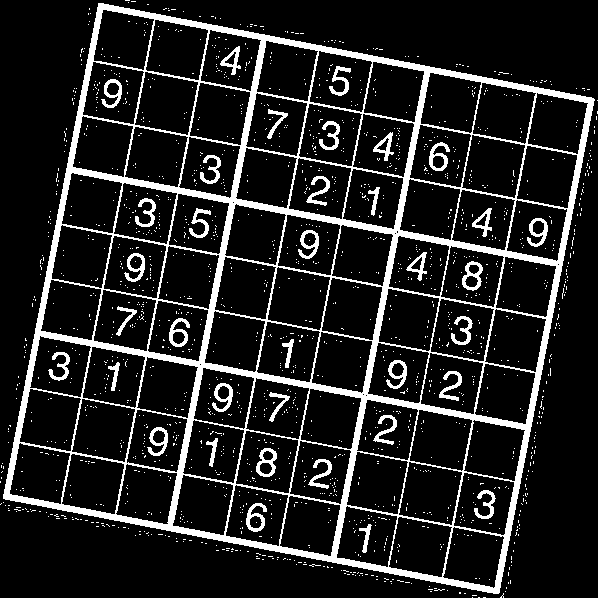

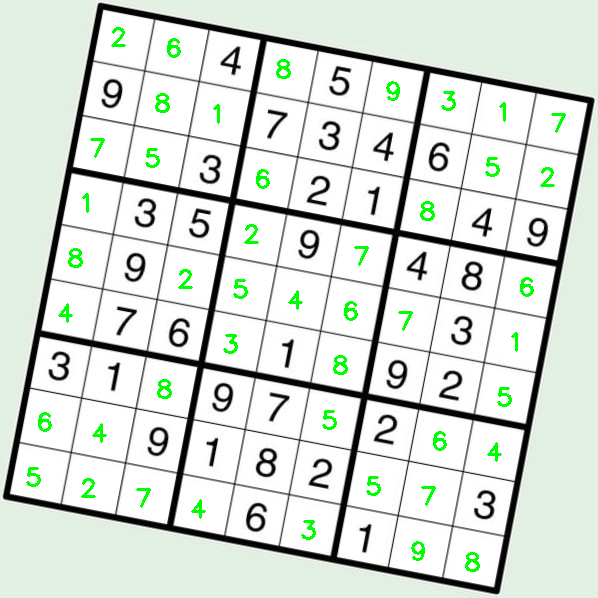

In [ ]:

def recognize_and_display_solution(image_path, model_path, solution_grid, debug=False):
    # Load the trained model
    model = load_model(model_path)

    # Preprocess the image
    image, gray, edged, adaptive_thresh, closed, thresh = preprocess_image(image_path)

    # Find the largest contour which is assumed to be the Sudoku grid
    sudoku_contour = find_sudoku_contour(image_path,adaptive_thresh)

    if sudoku_contour is not None:
        # Apply the perspective transform to obtain a top-down view of the Sudoku puzzle
        sudoku_contour = order_points(sudoku_contour.reshape(4, 2))  # Ensure correct order of corners
        warped = four_point_transform(gray, sudoku_contour)

        # Step size to segment the Sudoku grid into 9x9 cells
        stepX = warped.shape[1] // 9
        stepY = warped.shape[0] // 9

        # Define the corresponding points in the warped image (top-down view)
        src_pts = np.float32([[0, 0], [warped.shape[1], 0], [warped.shape[1], warped.shape[0]], [0, warped.shape[0]]])

        # Get the perspective transform matrix
        M = cv2.getPerspectiveTransform(src_pts, sudoku_contour)

        # Loop over each cell in the Sudoku grid to display only the solution digits (fill in blanks)
        for y in range(0, 9):
            for x in range(0, 9):
                # Only fill in the digit if the recognized grid cell is empty (i.e., 0)
                if sudoku_grid[y, x] == 0:
                    digit = solution_grid[y, x]

                    if digit > 0:
                        # Calculate the position in the top-down view (warped)
                        startX = x * stepX
                        startY = y * stepY
                        endX = (x + 1) * stepX
                        endY = (y + 1) * stepY
                        centerX = (startX + endX) // 2
                        centerY = (startY + endY) // 2

                        # Map the center point of the digit back to the original perspective
                        original_point = cv2.perspectiveTransform(np.array([[[centerX, centerY]]], dtype="float32"), M)[0][0]

                        # Draw the digit directly on the original image with black color and larger font size
                        cv2.putText(image, str(digit), (int(original_point[0]) - 10, int(original_point[1]) + 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)  # Black color and larger font size

        # Display the final result with the digits drawn on the original image
        cv2_imshow(image)
    else:
        print("Error in reading Image, Please Provide Another Image")

def order_points(pts):
    # Initialize a list of coordinates that will be ordered
    # top-left, top-right, bottom-right, and bottom-left
    rect = np.zeros((4, 2), dtype="float32")

    # The top-left point will have the smallest sum,
    # The bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # The top-right point will have the smallest difference,
    # The bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

recognize_and_display_solution(image_path, model_path, solution_grid, debug=True)